# Regression model to predict COVID-19 incidence rate per day

### Install packages

In [166]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [40]:
agg_data=pd.read_csv('C:/Users/matth/OneDrive/Documents/Projects/Science/Sentinel/COVID tracker/aggregated_covid_data.csv',sep = '|',\
                    index_col=0)
agg_data.head()

,NWSS_mi_757_Treatment plant_post grit removal,NWSS_mi_761_Treatment plant_post grit removal,NWSS_mi_762_Treatment plant_post grit removal,NWSS_mi_799_Treatment plant_post grit removal,NWSS_mi_800_Treatment plant_raw wastewater,NWSS_nv_554_Treatment plant_90_raw wastewater,NWSS_wi_231_Treatment plant_raw wastewater,NWSS_wv_2553_Treatment plant_raw wastewater,NWSS_wv_2558_Treatment plant_raw wastewater,NWSS_wv_2562_Treatment plant_raw wastewater,confirmed_cases,CTK_pos,COVID-NET,ER_adm,New_COVID_7DayADM_rate
week,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN
2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN


### When do these values start?

In [41]:
for col in agg_data.columns:
    print(col, agg_data[col].first_valid_index())

NWSS_mi_757_Treatment plant_post grit removal 2021-07-22
NWSS_mi_761_Treatment plant_post grit removal 2022-01-12
NWSS_mi_762_Treatment plant_post grit removal 2021-07-21
NWSS_mi_799_Treatment plant_post grit removal 2021-07-22
NWSS_mi_800_Treatment plant_raw wastewater 2021-07-22
NWSS_nv_554_Treatment plant_90_raw wastewater 2021-09-14
NWSS_wi_231_Treatment plant_raw wastewater 2022-01-27
NWSS_wv_2553_Treatment plant_raw wastewater 2021-11-11
NWSS_wv_2558_Treatment plant_raw wastewater 2020-11-01
NWSS_wv_2562_Treatment plant_raw wastewater 2021-09-19
confirmed_cases 2020-01-22
CTK_pos 2022-10-01
COVID-NET 2020-03-07
ER_adm 2022-10-01
New_COVID_7DayADM_rate 2020-08-08


In [42]:
for col in agg_data.columns:
    print(col, agg_data[col].last_valid_index())

NWSS_mi_757_Treatment plant_post grit removal 2024-09-28
NWSS_mi_761_Treatment plant_post grit removal 2024-09-29
NWSS_mi_762_Treatment plant_post grit removal 2024-09-28
NWSS_mi_799_Treatment plant_post grit removal 2024-09-21
NWSS_mi_800_Treatment plant_raw wastewater 2024-09-28
NWSS_nv_554_Treatment plant_90_raw wastewater 2024-09-23
NWSS_wi_231_Treatment plant_raw wastewater 2024-09-18
NWSS_wv_2553_Treatment plant_raw wastewater 2024-09-15
NWSS_wv_2558_Treatment plant_raw wastewater 2024-09-15
NWSS_wv_2562_Treatment plant_raw wastewater 2024-09-15
confirmed_cases 2022-01-26
CTK_pos 2024-09-21
COVID-NET 2024-09-21
ER_adm 2024-09-07
New_COVID_7DayADM_rate 2024-04-27


So it looks like I need to drop ER adm, since that doesn't start until October of 2022, and the last reliable testing cases were in Jan 2022. Same with Covid test poitivity rate. I can use hospitalization admission rate, COVID-NET, and the michigan plants. That's about it. 

If that doesn't work, I could also bring in vaccinations and variants, and use all the columns to predict hospitalizations from Aug 2020 to April 2024, and then use hospitalizations to predict actual cases per day.

In [45]:
comp_data=agg_data.loc['2020-03-07':'2022-01-26'].drop(['ER_adm','CTK_pos','New_COVID_7DayADM_rate','NWSS_wv_2553_Treatment plant_raw wastewater',\
                                            'NWSS_wi_231_Treatment plant_raw wastewater','NWSS_mi_761_Treatment plant_post grit removal'],axis=1)

In [46]:
comp_data.head()

,NWSS_mi_757_Treatment plant_post grit removal,NWSS_mi_762_Treatment plant_post grit removal,NWSS_mi_799_Treatment plant_post grit removal,NWSS_mi_800_Treatment plant_raw wastewater,NWSS_nv_554_Treatment plant_90_raw wastewater,NWSS_wv_2558_Treatment plant_raw wastewater,NWSS_wv_2562_Treatment plant_raw wastewater,confirmed_cases,COVID-NET
week,,,,,,,,,
2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1
2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133.0,NaN
2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6
2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7725.0,NaN
2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9


### Impute missing values

In [70]:
comp_data_imp=comp_data.ffill().bfill()

In [71]:
comp_data_imp.head()

,NWSS_mi_757_Treatment plant_post grit removal,NWSS_mi_762_Treatment plant_post grit removal,NWSS_mi_799_Treatment plant_post grit removal,NWSS_mi_800_Treatment plant_raw wastewater,NWSS_nv_554_Treatment plant_90_raw wastewater,NWSS_wv_2558_Treatment plant_raw wastewater,NWSS_wv_2562_Treatment plant_raw wastewater,confirmed_cases,COVID-NET
week,,,,,,,,,
2020-03-07,15.820374,15.115839,15.550345,15.336325,15.043196,13.729929,16.524904,1133.0,0.1
2020-03-11,15.820374,15.115839,15.550345,15.336325,15.043196,13.729929,16.524904,1133.0,0.1
2020-03-14,15.820374,15.115839,15.550345,15.336325,15.043196,13.729929,16.524904,1133.0,0.6
2020-03-18,15.820374,15.115839,15.550345,15.336325,15.043196,13.729929,16.524904,7725.0,0.6
2020-03-21,15.820374,15.115839,15.550345,15.336325,15.043196,13.729929,16.524904,7725.0,2.9


### Split cleaned and formatted data

In [135]:
y=comp_data_imp['confirmed_cases']
X = comp_data_imp.drop(['confirmed_cases'], axis=1)

In [145]:
train_start = '2020-03-07'
train_end='2021-03-01'
test_start = '2021-03-02'
test_end='2022-01-26'

In [146]:
X_train = X.loc[train_start:train_end]

In [147]:
y_train=y.loc[train_start:train_end]

In [148]:
X_val=X.loc[test_start:test_end]
y_val=y.loc[test_start:test_end]

In [167]:
regr= ExtraTreesRegressor()

In [170]:
regr.fit(X_train, y_train)

ExtraTreesRegressor()

In [171]:
results = pd.DataFrame( {'predictions' :regr.predict(X_val),
                         'actuals':y_val.values}, index = y_val.index)
results.head()

,predictions,actuals
week,,
2021-03-03,467710.00,447114.0
2021-03-06,432120.00,447114.0
2021-03-07,478713.24,447114.0
2021-03-08,418258.46,447114.0
2021-03-09,324849.56,447114.0


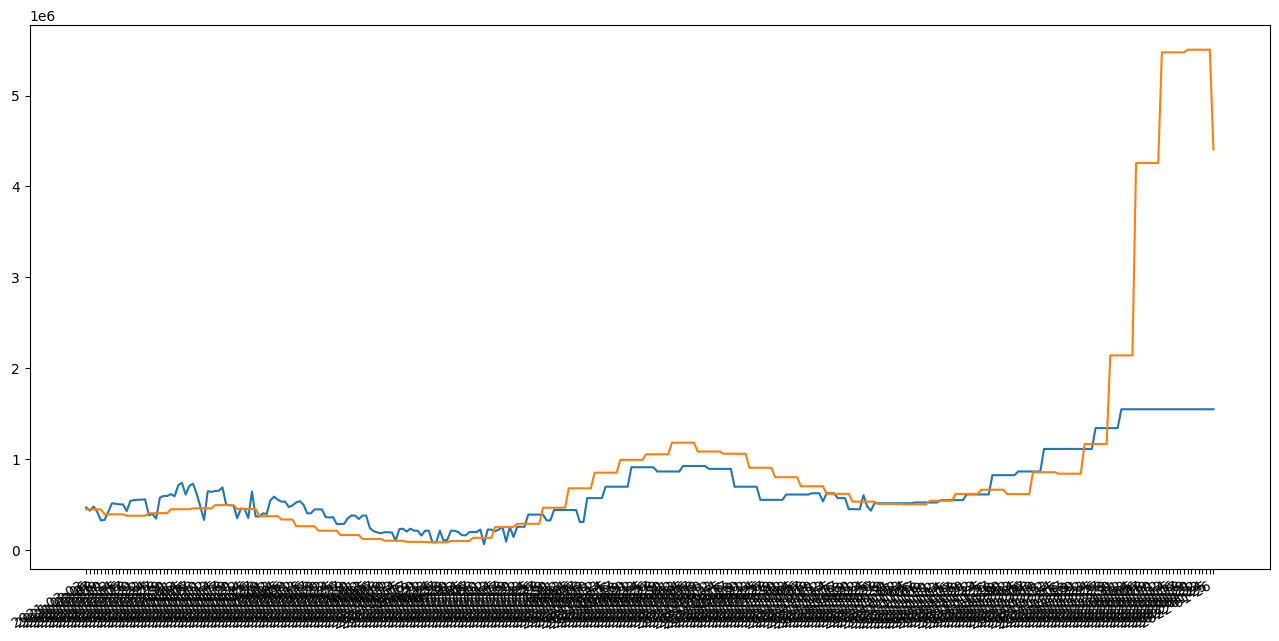

In [172]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(results)
fig.autofmt_xdate()